**Prática de Segmentação de imagens**

In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

In [7]:
def plot_histograma(image, title):
    # Calcular o histograma da imagem
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Plotar o histograma
    plt.figure(figsize=(10, 5))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Valor do Pixel')
    plt.ylabel('Número de Pixels')
    plt.xlim(0, 255)
    plt.grid(True)
    plt.show()

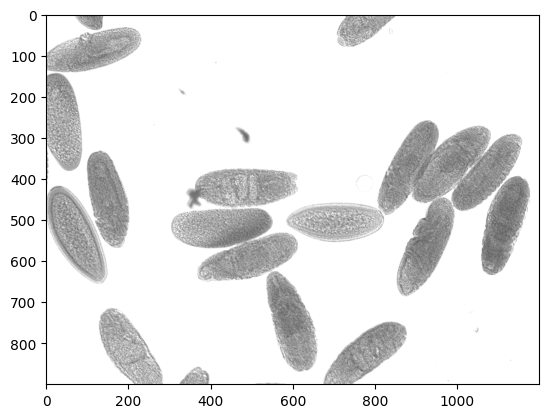

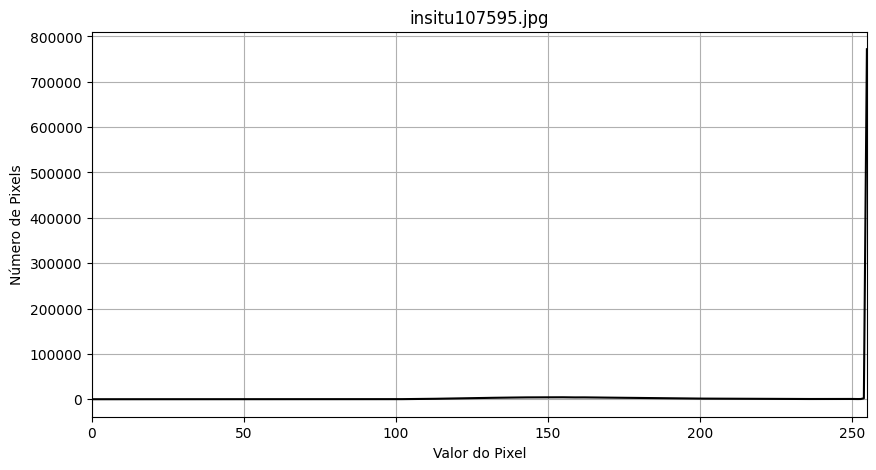

In [8]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)


plot_histograma(img1, "insitu107595.jpg")

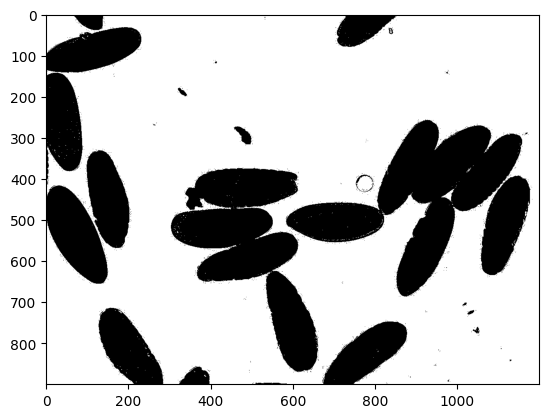

In [5]:
_, imagem_binaria = cv2.threshold(img1, 254, 1, cv2.THRESH_BINARY)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)


2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

In [9]:
def treshold_adaptativo(img):
    limiar_inicial = int(np.mean(img))
    limiar_atual = limiar_inicial
    variacao_limiar = -1

    while(variacao_limiar != 0):
        grupo_1 = [elemento for linha in img for elemento in linha if elemento < limiar_atual]
        grupo_2 = [elemento for linha in img for elemento in linha if elemento >= limiar_atual]

        media_grupo_1 = np.mean(grupo_1)
        media_grupo_2 = np.mean(grupo_2)

        novo_limiar = (media_grupo_1 + media_grupo_2) // 2

        variacao_limiar = limiar_atual - novo_limiar

        limiar_atual = novo_limiar

    _, imagem_binaria = cv2.threshold(img, limiar_atual, 1, cv2.THRESH_BINARY)

    return imagem_binaria

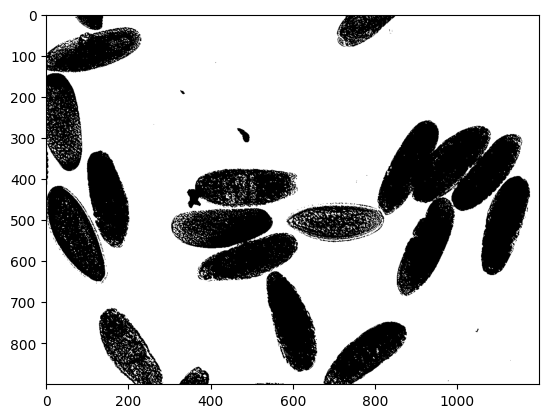

In [10]:
# SEGMENTAÇÃO SEM SUAVIZAÇÃO

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

imagem_binaria = treshold_adaptativo(img1)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

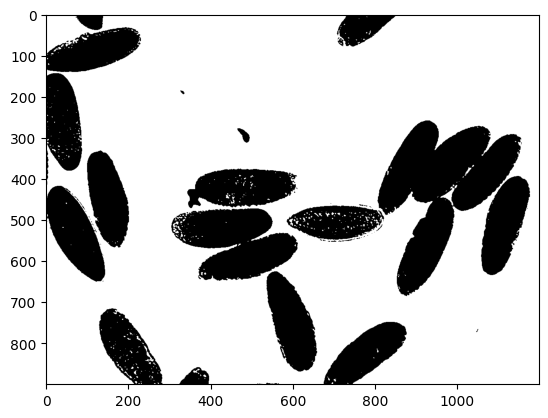

In [11]:
# SEGMENTAÇÃO COM SUAVIZAÇÃO

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img1, (5, 5), 0)

imagem_binaria = treshold_adaptativo(blur)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

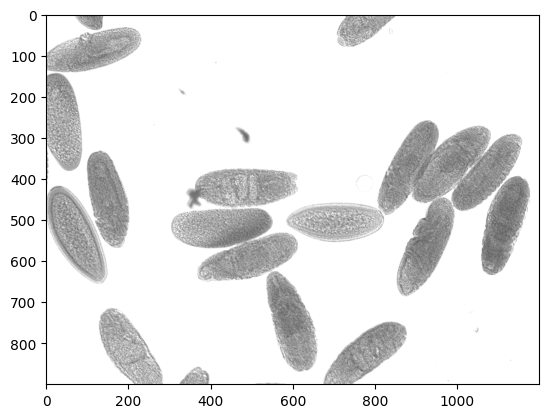

In [9]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

In [13]:
# Função para calcular a variância entre classes para um dado threshold
def calc_variancia_entre_classes(hist, total_pixels):
    sumB, wB, maximum = 0, 0, 0
    sum1 = np.dot(np.arange(256), hist)
    var_between_classes = np.zeros(256)
    for i in range(256):
        wB += hist[i]
        if wB == 0:
            continue
        wF = total_pixels - wB
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB
        mF = (sum1 - sumB) / wF
        var_between_classes[i] = wB * wF * (mB - mF) ** 2
    return var_between_classes

# Função para plotar o histograma e a variância entre classes
def plot_histograma_variancia(image, title):
    # Calcula o histograma
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    total_pixels = image.shape[0] * image.shape[1]

    # Calcula a variância entre classes
    variancia_entre_classes = calc_variancia_entre_classes(hist, total_pixels)

    # Calcula o threshold de Otsu
    otsu_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Plot do histograma e da variância entre classes
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Intensidade')
    ax1.set_ylabel('Frequência', color=color)
    ax1.plot(hist, color=color, label='Histograma')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Variância Entre Classes', color=color)
    ax2.plot(variancia_entre_classes, color=color, label='Variância')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Histograma e Variância Entre Classes - {title}')
    plt.axvline(x=otsu_thresh, color='green', linestyle='--', label=f'Threshold Otsu ({otsu_thresh})')
    fig.tight_layout()
    plt.show()

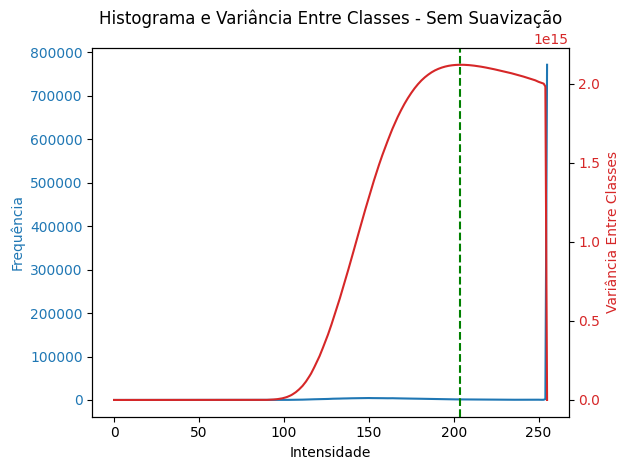

Text(0.5, 1.0, 'Sem Suavização - Threshold Otsu: 204.0')

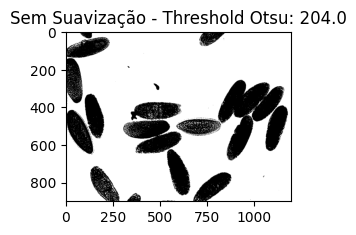

In [14]:
# Carrega a imagem em escala de cinza
image = cv2.imread('insitu107595.jpg', cv2.IMREAD_GRAYSCALE)

# Segmentação sem suavização
otsu_thresh, image_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(image, 'Sem Suavização')

# Exibe as imagens segmentadas
plt.subplot(1, 2, 1)
plt.imshow(image_otsu, cmap='gray')
plt.title(f'Sem Suavização - Threshold Otsu: {otsu_thresh}')

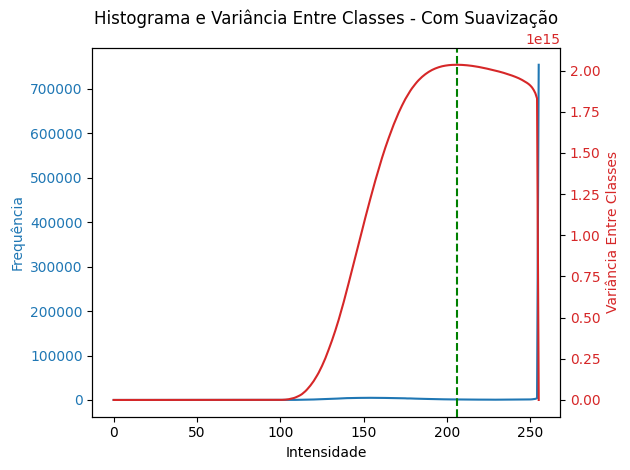

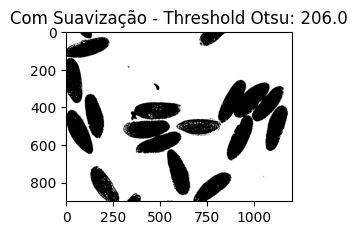

In [15]:
# Aplicando suavização com filtro gaussiano
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Segmentação com suavização
otsu_thresh_blur, image_otsu_blur = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(blurred_image, 'Com Suavização')


plt.subplot(1, 2, 2)
plt.imshow(image_otsu_blur, cmap='gray')
plt.title(f'Com Suavização - Threshold Otsu: {otsu_thresh_blur}')
plt.show()

## 4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)


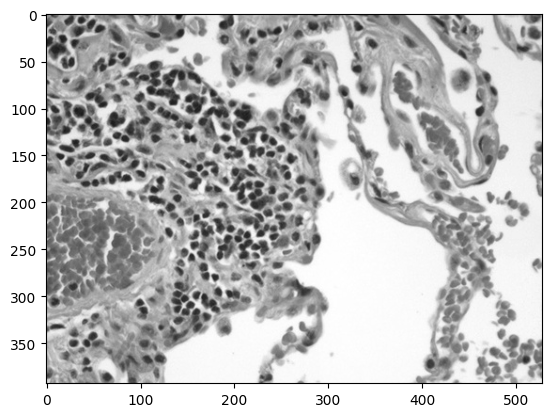

In [18]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

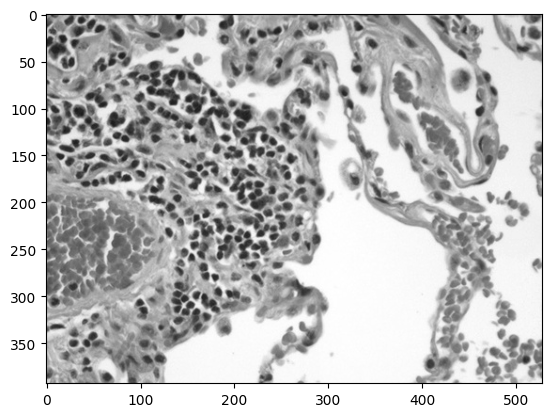

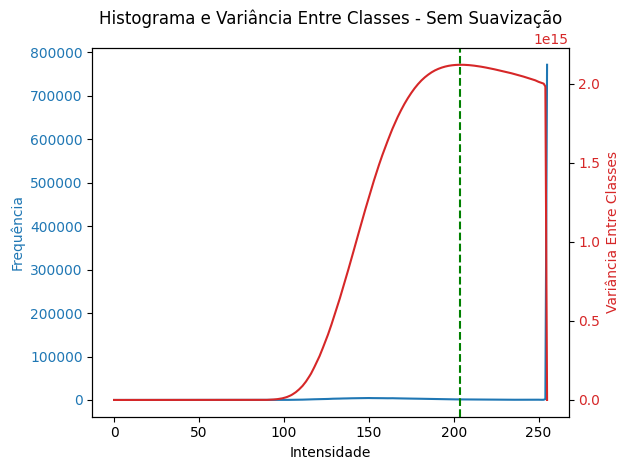

Text(0.5, 1.0, 'Sem Suavização - Threshold Otsu: 178.0')

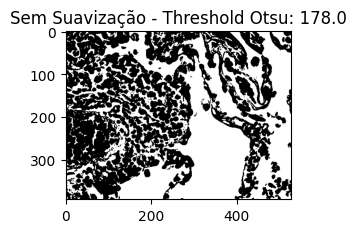

In [20]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Segmentação sem suavização
otsu_thresh, image_otsu = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(image, 'Sem Suavização')

# Exibe as imagens segmentadas
plt.subplot(1, 2, 1)
plt.imshow(image_otsu, cmap='gray')
plt.title(f'Sem Suavização - Threshold Otsu: {otsu_thresh}')

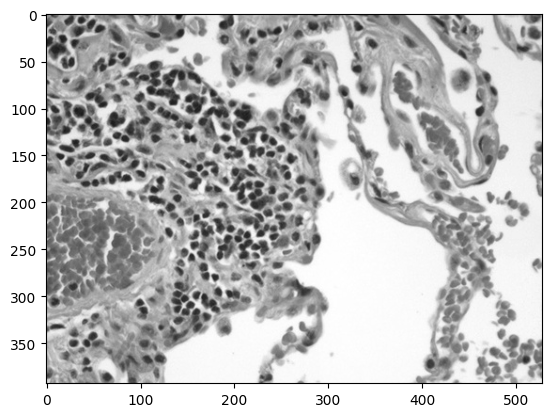

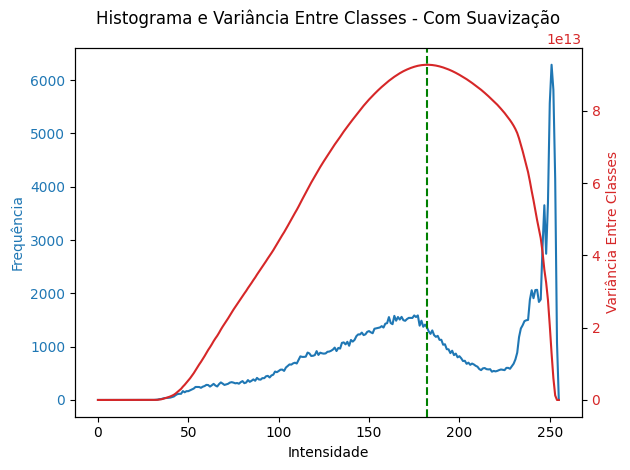

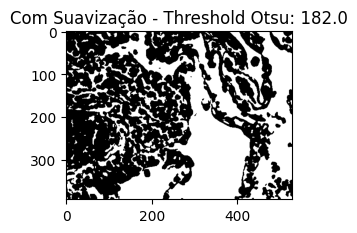

In [22]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Aplicando suavização com filtro gaussiano
blurred_image = cv2.GaussianBlur(img1, (5, 5), 0)

# Segmentação com suavização
otsu_thresh_blur, image_otsu_blur = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(blurred_image, 'Com Suavização')


plt.subplot(1, 2, 2)
plt.imshow(image_otsu_blur, cmap='gray')
plt.title(f'Com Suavização - Threshold Otsu: {otsu_thresh_blur}')
plt.show()

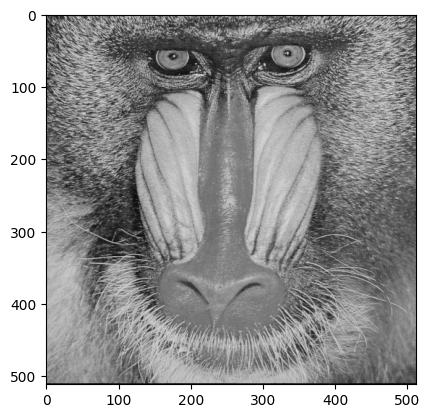

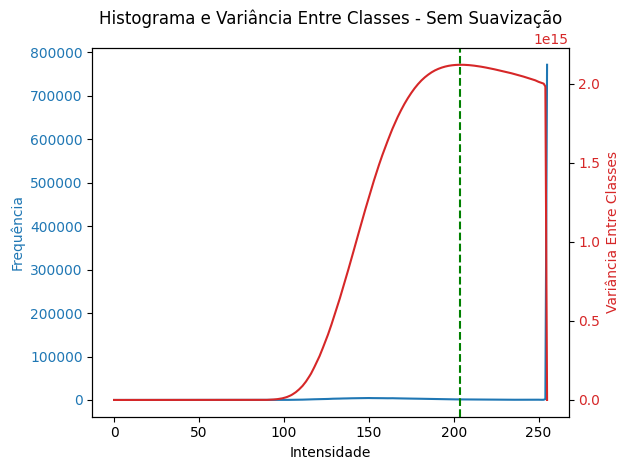

Text(0.5, 1.0, 'Sem Suavização - Threshold Otsu: 128.0')

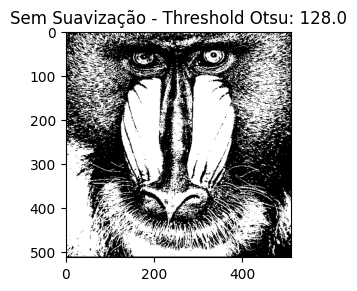

In [23]:
img1 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Segmentação sem suavização
otsu_thresh, image_otsu = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(image, 'Sem Suavização')

# Exibe as imagens segmentadas
plt.subplot(1, 2, 1)
plt.imshow(image_otsu, cmap='gray')
plt.title(f'Sem Suavização - Threshold Otsu: {otsu_thresh}')

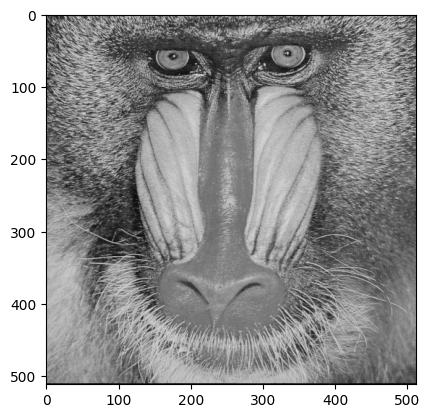

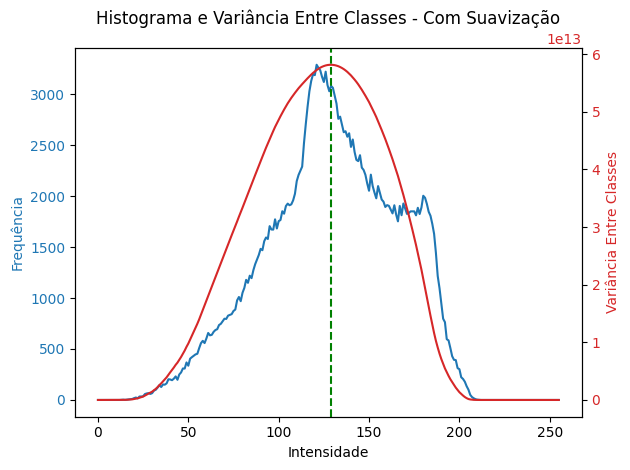

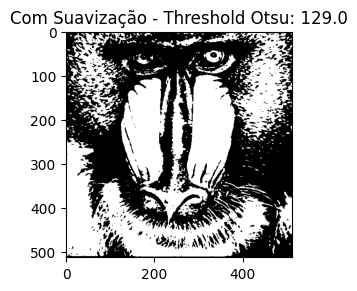

In [27]:
img1 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Aplicando suavização com filtro gaussiano
blurred_image = cv2.GaussianBlur(img1, (5, 5), 0)

# Segmentação com suavização
otsu_thresh_blur, image_otsu_blur = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(blurred_image, 'Com Suavização')


plt.subplot(1, 2, 2)
plt.imshow(image_otsu_blur, cmap='gray')
plt.title(f'Com Suavização - Threshold Otsu: {otsu_thresh_blur}')
plt.show()

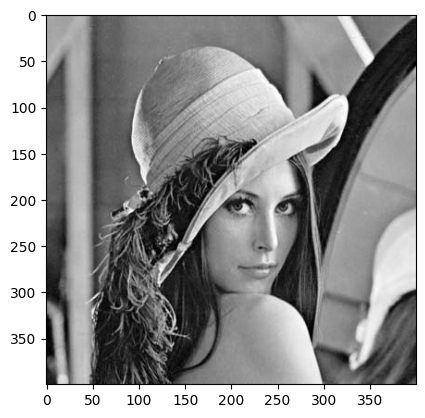

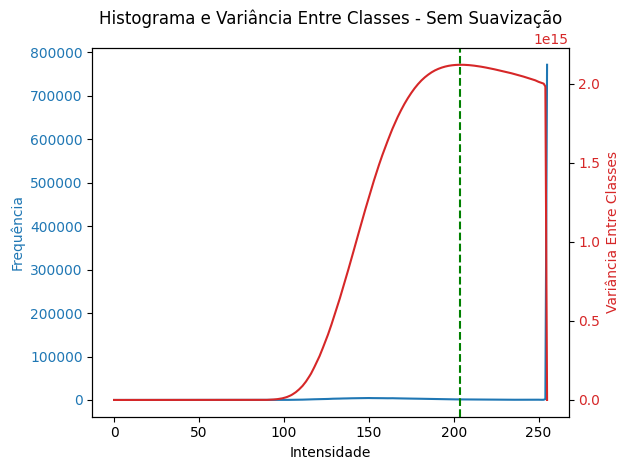

Text(0.5, 1.0, 'Sem Suavização - Threshold Otsu: 112.0')

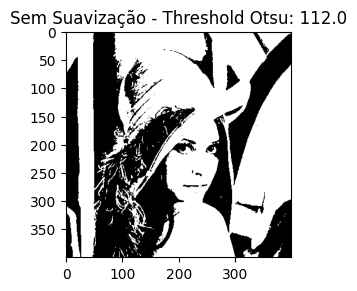

In [28]:
img1 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Segmentação sem suavização
otsu_thresh, image_otsu = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(image, 'Sem Suavização')

# Exibe as imagens segmentadas
plt.subplot(1, 2, 1)
plt.imshow(image_otsu, cmap='gray')
plt.title(f'Sem Suavização - Threshold Otsu: {otsu_thresh}')

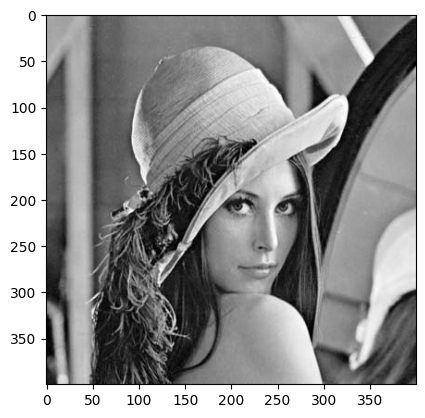

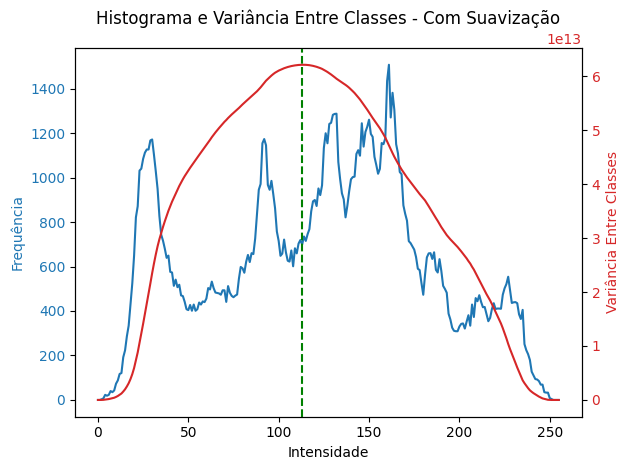

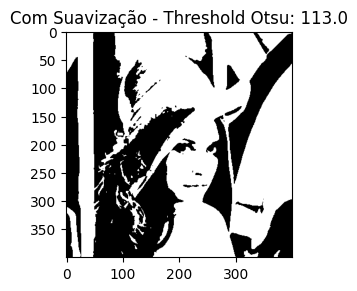

In [29]:
img1 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

# Aplicando suavização com filtro gaussiano
blurred_image = cv2.GaussianBlur(img1, (5, 5), 0)

# Segmentação com suavização
otsu_thresh_blur, image_otsu_blur = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_histograma_variancia(blurred_image, 'Com Suavização')


plt.subplot(1, 2, 2)
plt.imshow(image_otsu_blur, cmap='gray')
plt.title(f'Com Suavização - Threshold Otsu: {otsu_thresh_blur}')
plt.show()